# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Write your code here to read the data
df = pd.read_csv('D:/Dev/AI-ML-Course/PythonFundamentalProject-Practice/foodhub_order.csv')

In [3]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
df.shape

(1898, 9)

#### Observations:


Data set from foodhub_order.csv contains 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [20]:
# Convert object columns to str type to use as lables
df['restaurant_name'] = df['restaurant_name'].astype(str)
df['cuisine_type'] = df['cuisine_type'].astype(str)
df['day_of_the_week'] = df['day_of_the_week'].astype(str)
# Convert 'Not given' to NaN
df['rating'] = df['rating'].replace('Not given', pd.NA)
# Convert the column to numeric type
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# check how it looks now 
df.info()
a = df['restaurant_name'].unique()
print(sorted(a))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB
["'wichcraft", '12 Chairs', '5 Napkin Burger', '67 Burger', 'Alidoro', 'Amma', "Amy Ruth's", 'Anjappar Chettinad', 'Asuka Sushi', 'Aurora', 'Balade', 'Balthazar Boulangerie', 'Barbounia', 'Bareburger', 'Benihana', 'Bhatti Indian Grill', "Big Daddy's", 'Big W

#### Observations:


1. Dataset consists of 1898 rows and 9 columns, indicating medium sized dataset for analysis
2. Column Types -

There are four categorical columns (restaurant_name, cuisine_type, day_of_the_week, and rating), one continuous numerical column (cost_of_the_order), and four discrete numerical columns (order_id, customer_id, food_preparation_time, and delivery_time).
The rating column is currently stored as an object type, likely containing both numeric ratings and the placeholder "Not given." This should be addressed for accurate analysis.

3. Non-Null Counts -

All columns have 1898 non-null entries, indicating that there are no missing values in the dataset. This is beneficial as it simplifies data cleaning processes.

4. Cost of Orders:

The presence of a float64 type column (cost_of_the_order) suggests that the dataset includes decimal values, which are crucial for analyzing order costs and revenue.
Food Preparation and Delivery Times:

5. The food preparation time and delivery time are stored as integers, allowing for straightforward calculations of average times and identification of outliers.

6. Diverse Data:

The inclusion of various cuisine types and restaurant names offers an opportunity to explore customer preferences and trends, especially if certain cuisines are more popular or have higher ratings.

7. Categorical Variables:

The day_of_the_week variable can help analyze order patterns and peak days for the restaurant, while the rating variable can be analyzed to understand customer satisfaction.

8. Memory Usage:

The dataset uses approximately 133.6 KB of memory, shows that it's manageable size for data processing tasks does not raise any performance concerns.

# Summary
    Overall, the dataset seems well-structured for exploratory data analysis, with no missing values and a variety of variables that can provide insights into customer behavior, preferences, and operational efficiency.
    It will be required to convert the rating column into a numeric format for quantitative analysis and to explore the relationships between different variables for actionable insights.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [17]:
# Write your code here
print(df.isnull().sum())
df.isna()
not_rated_orders = (df['rating'].isna()).sum()

print(f"Number of orders not rated: {not_rated_orders}")

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
Number of orders not rated: 0


#### Observations:


- There are no null values in Daata set 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


- Minimum food preparation time is 20 minutes
- Average food preparation time is 27 minutes (to be precise 27.371970 minutes)
- Maximum food preparation time is 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [50]:
# Write the code here
count = df['rating'].value_counts()['Not given']
print(count)

KeyError: 'Not given'

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# Write the code here

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [12]:
# Write the code here
# Group by 'restaurant_name' and count the number of orders, then sort in descending order
top_restaurants = df['restaurant_name'].value_counts().head(5)

print(top_restaurants)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


Here List of top 5 resutairants, where Shake Shack is #1 with order count as 219
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [9]:
# Write the code here

# Filter the data for weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Group by 'cuisine_type' and count the number of orders, then sort in descending order
most_popular_cuisine = weekend_orders['cuisine_type'].value_counts().idxmax()

print(f"The most popular cuisine on weekends is: {most_popular_cuisine}")


The most popular cuisine on weekends is: American


#### Observations:


It appears from analysis that American cusine is the most popular one during weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [8]:
# Write the code here
# Count the number of orders with a cost greater than 20 dollars
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]

# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the percentage of orders costing more than 20 dollars
percentage_above_20 = (orders_above_20 / total_orders) * 100

print(f"The percentage of orders that cost more than 20 dollars is: {percentage_above_20:.2f}%")

The percentage of orders that cost more than 20 dollars is: 29.24%


#### Observations:


It appears that little less than 30 % of order are $20 or more
This means vast majority of orders are below $20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [10]:
# Write the code here
# Calculate the mean of the 'delivery_time' column
mean_delivery_time = df['delivery_time'].mean()

print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")


The mean order delivery time is: 24.16 minutes


#### Observations:


# It appears that mean delivery time is around 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [13]:
# Write the code here
# Group by 'customer_id' and count the number of orders each customer has placed
customer_order_count = df.groupby('customer_id').size().reset_index(name='order_count')
# Sort the customers by the number of orders in descending order
sorted_customers = customer_order_count.sort_values(by='order_count', ascending=False)

# Extract the top 3 most frequent customers
top_3_customers = sorted_customers.head(3)

# Display the customer IDs and the number of orders they placed
print(top_3_customers)

     customer_id  order_count
116        52832           13
84         47440           10
333        83287            9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


# # Showing Correlation among key variables by ploting the heatmap


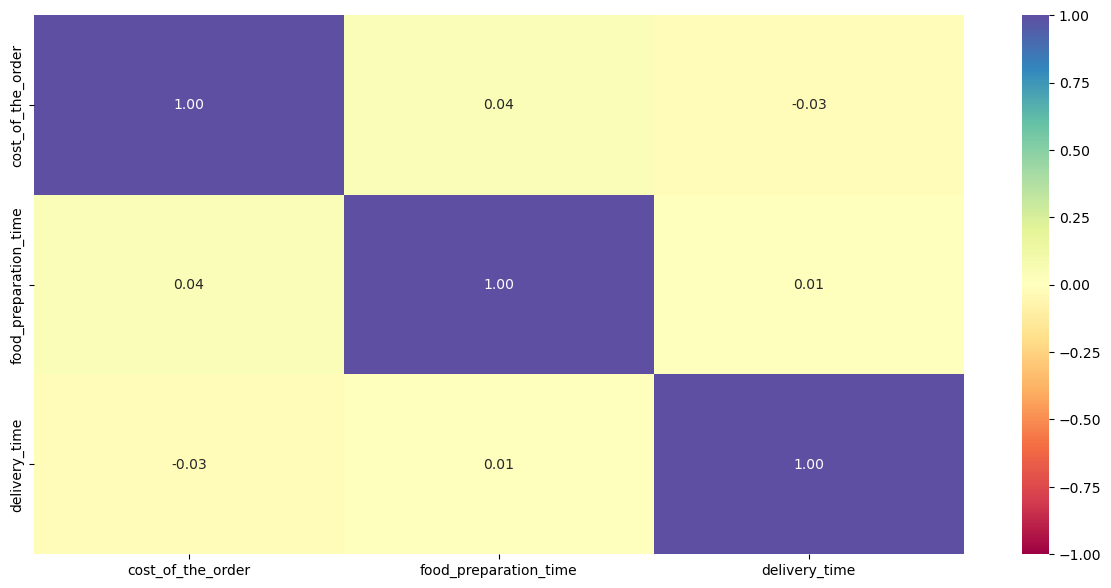

# # Day of the week vs Delivery Time
# Relationship between Day of the week and Delivery Time


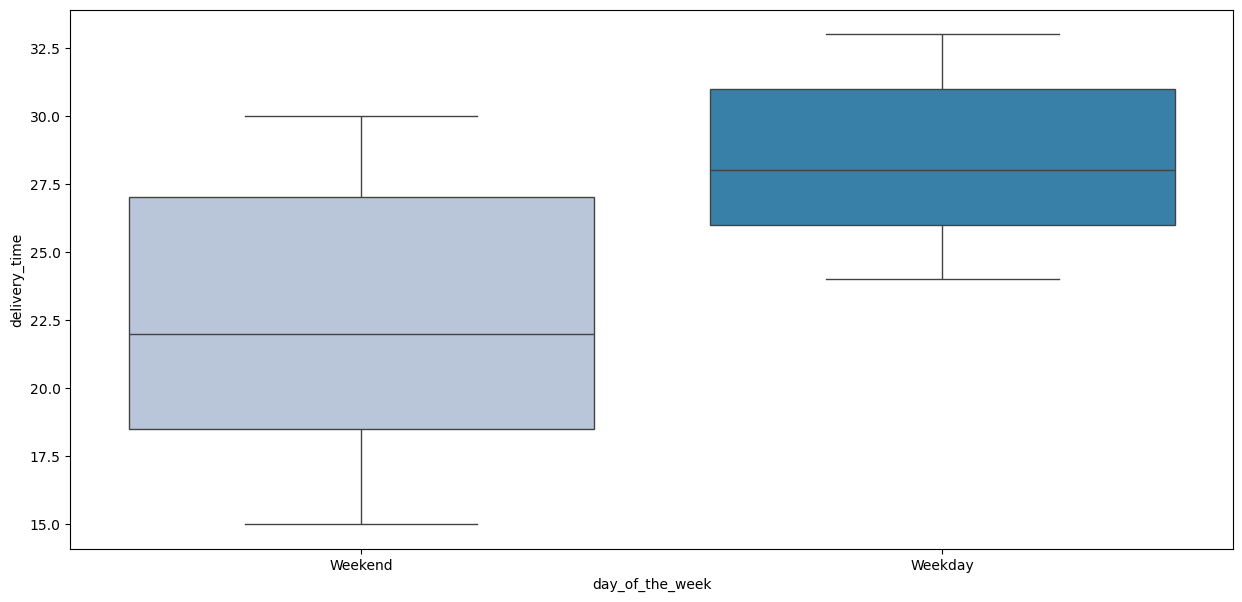

# # Rating vs Delivery Time
# Showing relationship between Rating and Delivery Time


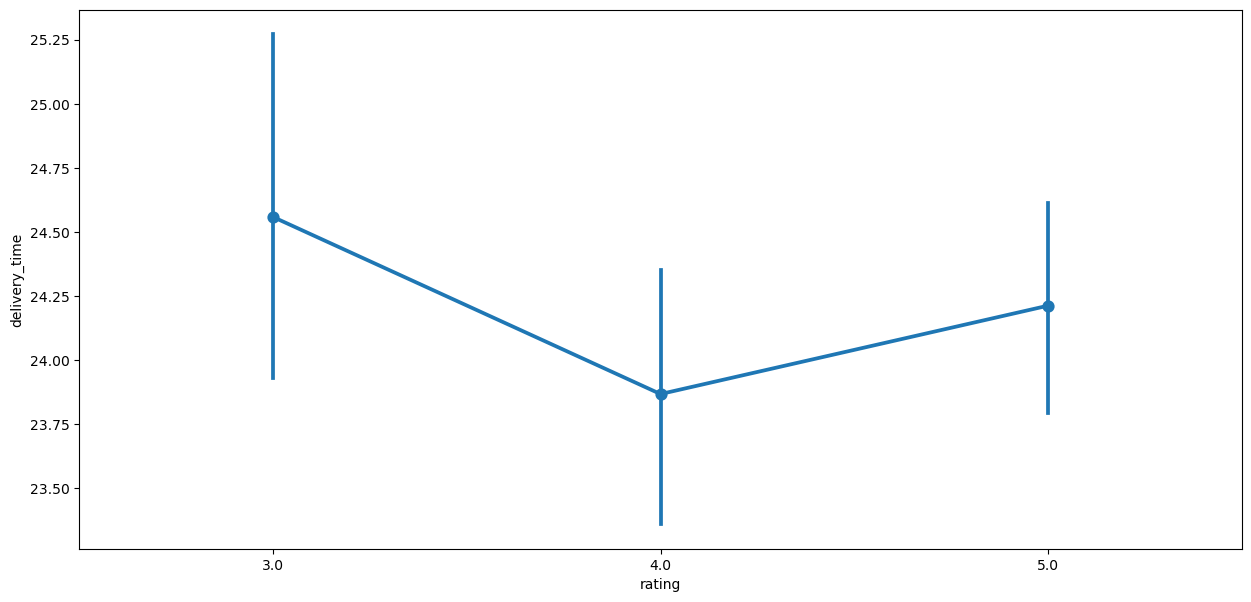

# # Rating vs Food preparation Time
# Relationship between Rating and Food preperation


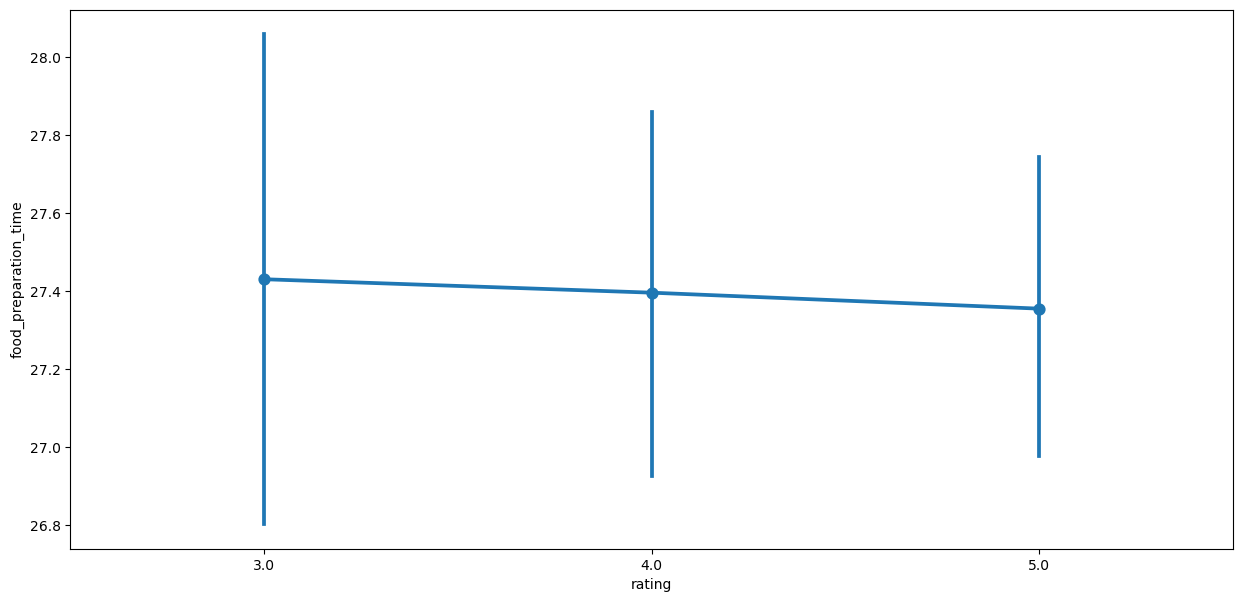

# # Rating vs Cost of the order
# Relationship between Rating and cost of the order


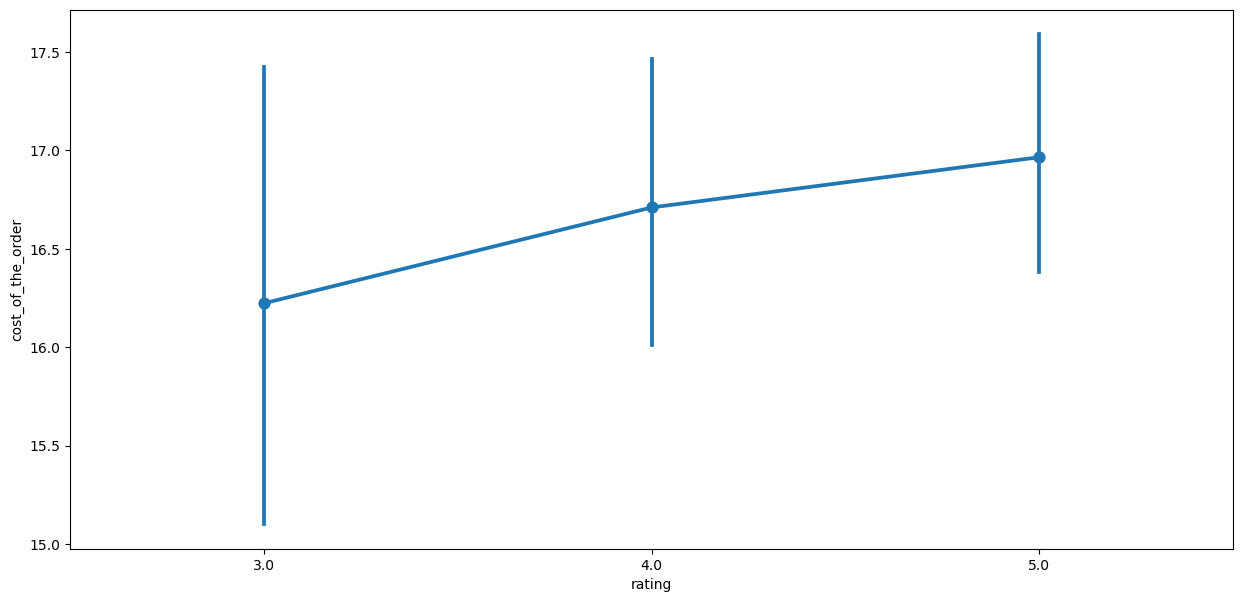

# # Cuisine vs Cost of the order
# Relationship between cost of the order and cuisine type


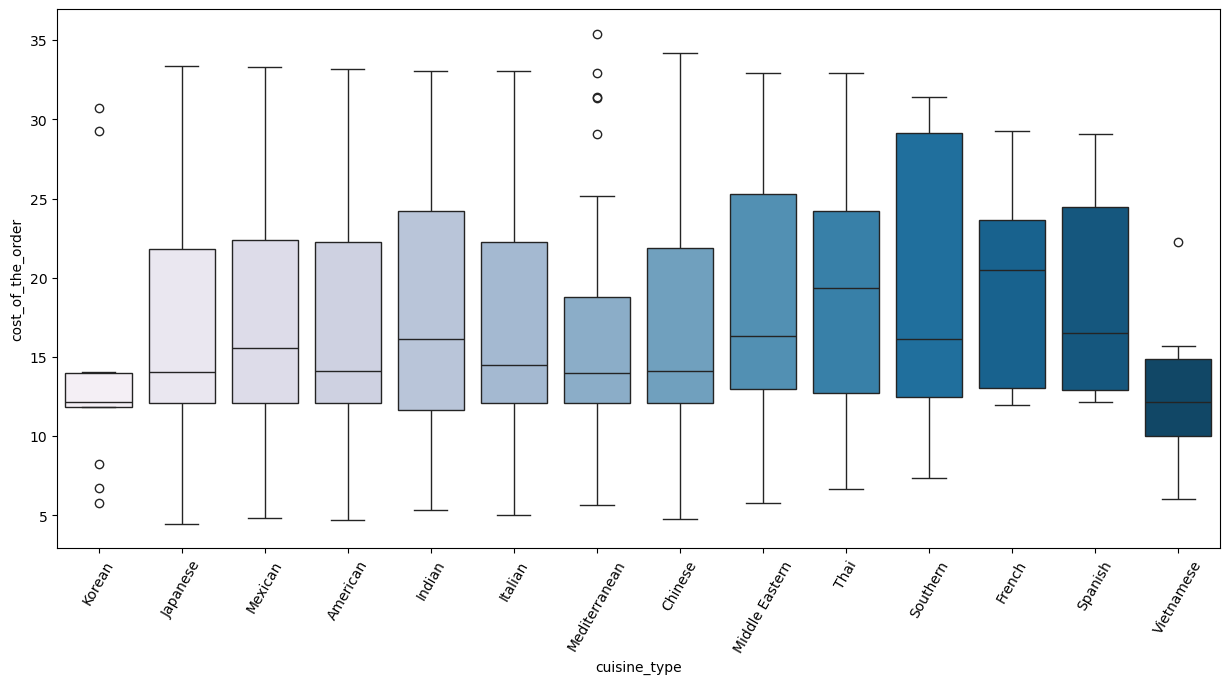

# # Food Preparation Time vs Cuisine Type
# Showing relationship between Food preparation and cuisine type


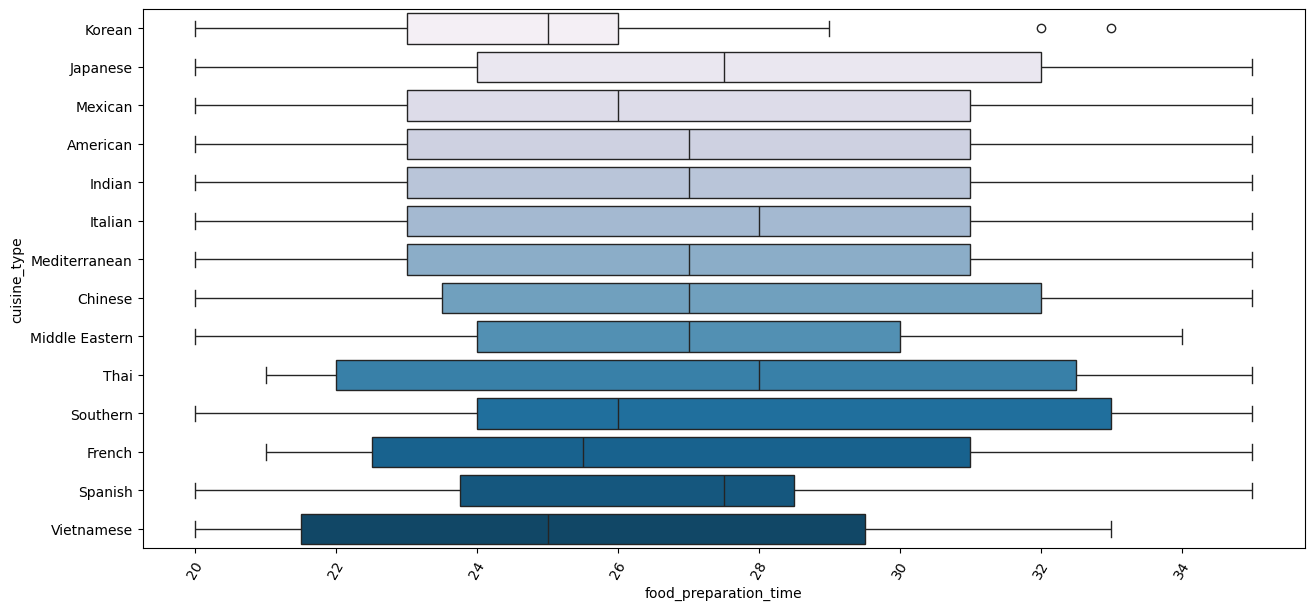

0.01109428796208662


In [47]:
# Write the code here
# Ignore seaborn and matlib warnings
import warnings
warnings.filterwarnings("ignore")

print ('# # Showing Correlation among key variables by ploting the heatmap')
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

print ('# # Day of the week vs Delivery Time')
print ('# Relationship between Day of the week and Delivery Time')
plt.figure(figsize=(15,7))
sns.boxplot (x = 'day_of_the_week', y = 'delivery_time', data = df, palette= 'PuBu')
plt.show()

print ('# # Rating vs Delivery Time')
print ('# Showing relationship between Rating and Delivery Time')
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

print ('# # Rating vs Food preparation Time')
print ('# Relationship between Rating and Food preperation')
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating' , y = 'food_preparation_time' , data=df)
plt.show()

print ('# # Rating vs Cost of the order')
print ('# Relationship between Rating and cost of the order')
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating' , y = 'cost_of_the_order' , data = df)
plt.show()

print ('# # Cuisine vs Cost of the order')
print ('# Relationship between cost of the order and cuisine type')
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

print ('# # Food Preparation Time vs Cuisine Type')
print ('# Showing relationship between Food preparation and cuisine type')
plt.figure(figsize=(15,7))
sns.boxplot(x = 'food_preparation_time' , y = 'cuisine_type' , data= df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

# relationship of the total order cost for each restaurant and then sorting these totals. 
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)



# Compute the correlation matrix for numerical variables
corr_matrix = df['food_preparation_time'].corr(df['delivery_time'])
print(corr_matrix)
#df.corr()
#ValueError: could not convert string to float: 'Hangawi'
#corr_matrix = df.corr()



# Plot the heatmap to visualize the correlations
#plt.figure(figsize=(10, 6))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix of Numerical Variables')
#plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [32]:
# Write the code here

# Find restaurants rating_count > 50 
rating_counts = df["rating"].value_counts
#rest_names = df[df['rating']>50]['restaurant_name']
#print(rating_counts)
df_rating_count = df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
print(rest_names)

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df[df['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

print(df_mean_4)
# Find restaurants average_rating > 4
#df['rating'] > 4

# Filter restaurants that meet the criteria: rating_count > 50 and average_rating > 4
#eligible_restaurants = df[(df['rating_count'] > 50) & (df['average_rating'] > 4)]

# Display the restaurants that qualify for the promotional offer
#print(eligible_restaurants[['restaurant_name', 'rating_count', 'average_rating']])


0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object
      order_id  customer_id            restaurant_name cuisine_type  \
3      1477334       106968  Blue Ribbon Fried Chicken     American   
6      1477894       157711          The Meatball Shop      Italian   
12     1476966       129969  Blue Ribbon Fried Chicken     American   
15     1477414        66222                Shake Shack     American   
19     1477354        67487          Blue Ribbon Sushi     Japanese   
...        ...          ...                        ...          ...   
1887   1476873       237616                Shake Shack     American   
1888   1477353       106324          The Meatball Shop      Italian   
1891   1476981       138586                Shake Shack     American   
1895   1477819        35309          Blue Ribbon Sushi     Japanese   
1897   1478056       120353          Blue Ribbon Sushi    

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [35]:
# Write the code here
# create function to compute the revenue based on condition in Q14
def compute_revenue(cost): 
    if cost > 20: 
        return cost*0.25 
    elif cost > 5: 
        return cost*0.15 
    else: 
        return cost*0


df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)

#Function to get the total revenue
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [36]:
# Write the code here
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

#find the percentage of orders that have more than 60 minutes of total delivery time
df_greater_than_60 = df[df['total_time']>60]

print('The total number of orders that took more than 60 minutes to get delivered is:', df_greater_than_60.shape[0])

percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders that took more than 60 minutes to get delivered:", round(percentage, 2), '%')


The total number of orders that took more than 60 minutes to get delivered is: 200
Percentage of orders that took more than 60 minutes to get delivered: 10.54 %


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [37]:
# Write the code here

print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')


# In[46]:


#Code below will get the mean delivery time on weekends and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekends is around 22 minutes
The mean delivery time on weekdays is around 28 minutes


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

# ### Conclusions:
# *  From the thorough analysis of FoodHub's data, it's clear that the platform is providing a vital service in a bustling city like New York where the demand for online food delivery is high. The significant number of unique customers and orders suggest that the platform is extensively utilized, pointing towards the success of FoodHub's business model.
# 
# Key observations include:
# 
# *  A majority of orders are placed during the weekends, indicating that FoodHub is a preferred choice for customers' leisure time or when they're likely away from their usual routine.
# *  A significant portion of orders are of cuisines like American, Japanese, and Italian, suggesting a diverse clientele with varied food preferences.
# *  Restaurants with higher ratings and more ratings tend to be more popular, reflecting the importance of quality and customer feedback in driving order volumes.
# *  The revenue generation from orders above $20 is substantial due to the higher margin on these orders.
# *  While the average delivery time is under the acceptable limit of 30 minutes, around 10% of orders take more than an hour, which suggests a potential area for improvement.
# 
# In conclusion, FoodHub's business is well-positioned in the online food delivery market, but there is room for further growth and efficiency. Focusing on promoting high-rated restaurants, encouraging customer feedback, diversifying restaurant and cuisine options, and improving delivery times could be key areas to consider for enhancing customer satisfaction and business expansion.

### Recommendations:

*  

# ### Recommendations:
# 
# *  **Increase American and Japanese Cuisine Options**: Partner with more restaurants offering these cuisines and offer promotions to increase orders from these types of restaurants.
# 
# *  **Promote High-rated Restaurants:** Advertise these restaurants more to boost customer satisfaction.
# 
# *  **Investigate Delivery Time Differences:** Identify the reasons behind faster weekend delivery times and if possible, try to replicate these conditions on weekdays.
# 
# *  **Encourage Order Ratings:** Provide incentives for customers to rate their orders, giving the company more data to identify improvement areas.
# 
# *  **Loyalty or Rewards Program:** Consider a program to retain the top customers who place the most orders, encouraging them to order more frequently.
# 
# *  **Re-evaluate Revenue Generation Strategy:** The company may want to explore if changing the fee structure could potentially increase revenue without negatively impacting customer orders.
# 
# *  **Reduce Delivery Time:** Investigate why approximately 10% of orders take more than an hour to deliver and take targeted measures to reduce this percentage.

---